## **To explore and implement principle component analysis**


Reduced Data (after PCA):
         PC1       PC2
0  1.111595  0.280954
1 -2.535966 -0.249783
2  1.464792 -0.443255
3  0.424204 -0.161060
4  2.531100  0.257184
5  1.515352 -0.274736
6 -0.142699  0.417393
7 -1.784483 -0.032138
8 -0.620671 -0.042638
9 -1.963225  0.248081


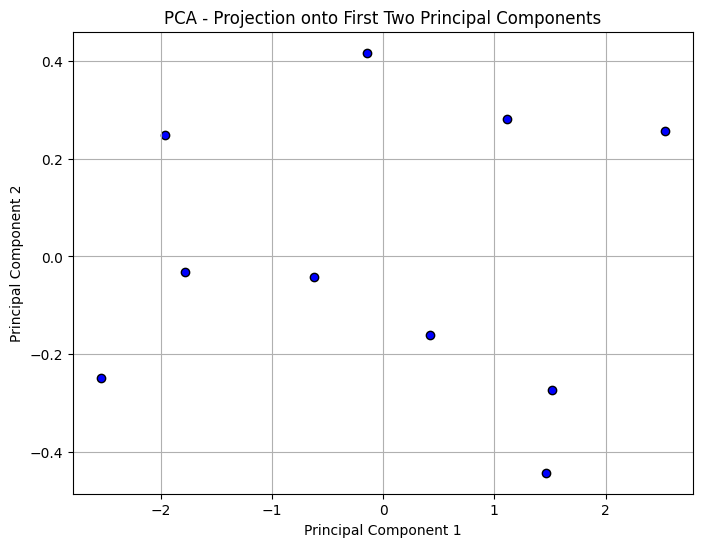

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Sample dataset (10 records, 3 features)
data = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 1.4],
    [1.9, 2.2, 1.1],
    [3.1, 3.0, 1.7],
    [2.3, 2.7, 1.5],
    [2.0, 1.6, 0.9],
    [1.0, 1.1, 0.4],
    [1.5, 1.6, 0.8],
    [1.1, 0.9, 0.3]
])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])

# Step 2: Standardization using pandas
standardized_data = (df - df.mean()) / df.std()

# Step 3: Covariance matrix
cov_matrix = np.cbnov(standardized_data.T)

# Step 4: Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Step 5: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

# Step 6: Select top 2 eigenvectors
eig_vecs_subset = eig_vecs[:, :2]

# Step 7: Project data to new basis
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

# Step 8: Output the reduced data
print("\nReduced Data (after PCA):\n", reduced_df)

# Step 9: Visualize
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], color='blue', edgecolor='k')
plt.title('PCA - Projection onto First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()